# Happy Customers
### Context:
We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. From operational standpoint we have been facing several different challenges and everyday we are trying to address these challenges.  

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.  

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.
We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.    

### Objective:  
1. Predict if a customer is happy or not based on the answers they give to questions asked.
2. Reach 73% F1 score or above.
3. Identify features most important when predicting a customer's happiness.
4. Discover minimal set of features what would preserve the most information about the problem while increasing predictabiliy of the data.

### Dataset: 
- Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers   
- X1 = my order was delivered on time  
- X2 = contents of my order was as I expected  
- X3 = I ordered everything I wanted to order  
- X4 = I paid a good price for my order  
- X5 = I am satisfied with my courier  
- X6 = the app makes ordering easy for me    

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.  

### Load Dataset and perform Exploratory Data Analysis:  

In [4]:
# import necessary libraries for modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load csv dataset
customer_survey_filepath = '../data/raw/ACME-HappinessSurvey2020.csv'
#customer_survey_filepath = 'ACME-HappinessSurvey2020.csv'
customer_survey = pd.read_csv(customer_survey_filepath)

# Rename column names for better interpretability
customer_survey.rename(columns = {
    'Y':'Target',
    'X1':'Delivered_On_Time',
    'X2':'Contents_As_Expected',
    'X3':'Everything_Wanted_Ordered',
    'X4':'Good_Price',
    'X5':'Satisfied_With_Courier',
    'X6':'Ordering_Ease'
},inplace=True)
customer_survey.head()
customer_survey.to_csv('../data/interim/renamed_customer_survey.csv', index=False)


In [2]:
customer_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Target                     126 non-null    int64
 1   Delivered_On_Time          126 non-null    int64
 2   Contents_As_Expected       126 non-null    int64
 3   Everything_Wanted_Ordered  126 non-null    int64
 4   Good_Price                 126 non-null    int64
 5   Satisfied_With_Courier     126 non-null    int64
 6   Ordering_Ease              126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


**Observations:**
- There are no missing values in the dataset. 
- The dataset contains 126 rows with 7 columns. 

In [11]:
customer_survey.describe().T

,count,mean,std,min,25%,50%,75%,max
Target,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
Delivered_On_Time,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
Contents_As_Expected,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
Everything_Wanted_Ordered,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
Good_Price,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
Satisfied_With_Courier,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
Ordering_Ease,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


**Summary Statistics:**  
- The target attribute's mean was 55%, a slightly higher proportion of happy customers. 
- Nearly all features have a mean above 3/5, indicating a general outlook of positive feedback.
- **Contents_As_Expected(X2)** has the lowest mean, implies this feature might contribute the most to customer dissatisfication with the app.  
- **Ordering_Ease(X6)** and **Delivered_On_Time(X1)** has the highest means above 4 points, suggesting customers had high satisfication with  
  how fast the order was delivered and the ease of using the app to order.


#### Barplots of the target variable and features:  

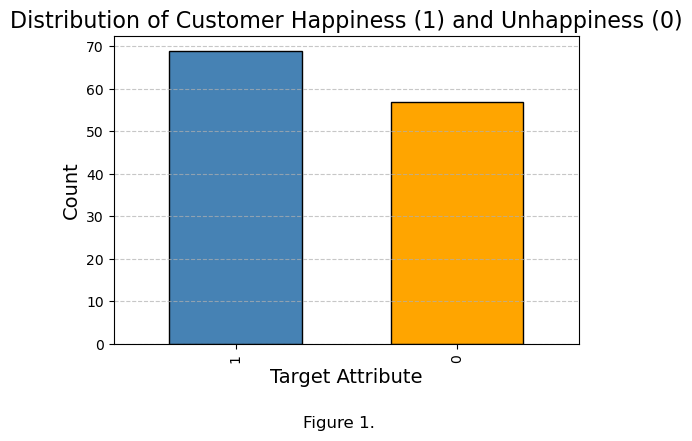

In [5]:
import matplotlib.pyplot as plt

# Create figure and axis with optimized size
fig, ax = plt.subplots(figsize=(6,4))

# Plot distribution of Target variable
bars = customer_survey['Target'].value_counts().plot(
    kind='bar',
    color=['steelblue','orange'],
    edgecolor='black',
    width=0.6,
    ax=ax
)

# Set labels and title with proper formatting
ax.set_xlabel('Target Attribute', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Customer Happiness (1) and Unhappiness (0)', fontsize=16)
ax.yaxis.grid(True,linestyle='--',alpha=0.7)

# Add "Figure 1." label at the bottom of the figure
fig.text(0.5, -0.1, 'Figure 1.', fontsize=12, ha='center')

plt.show()

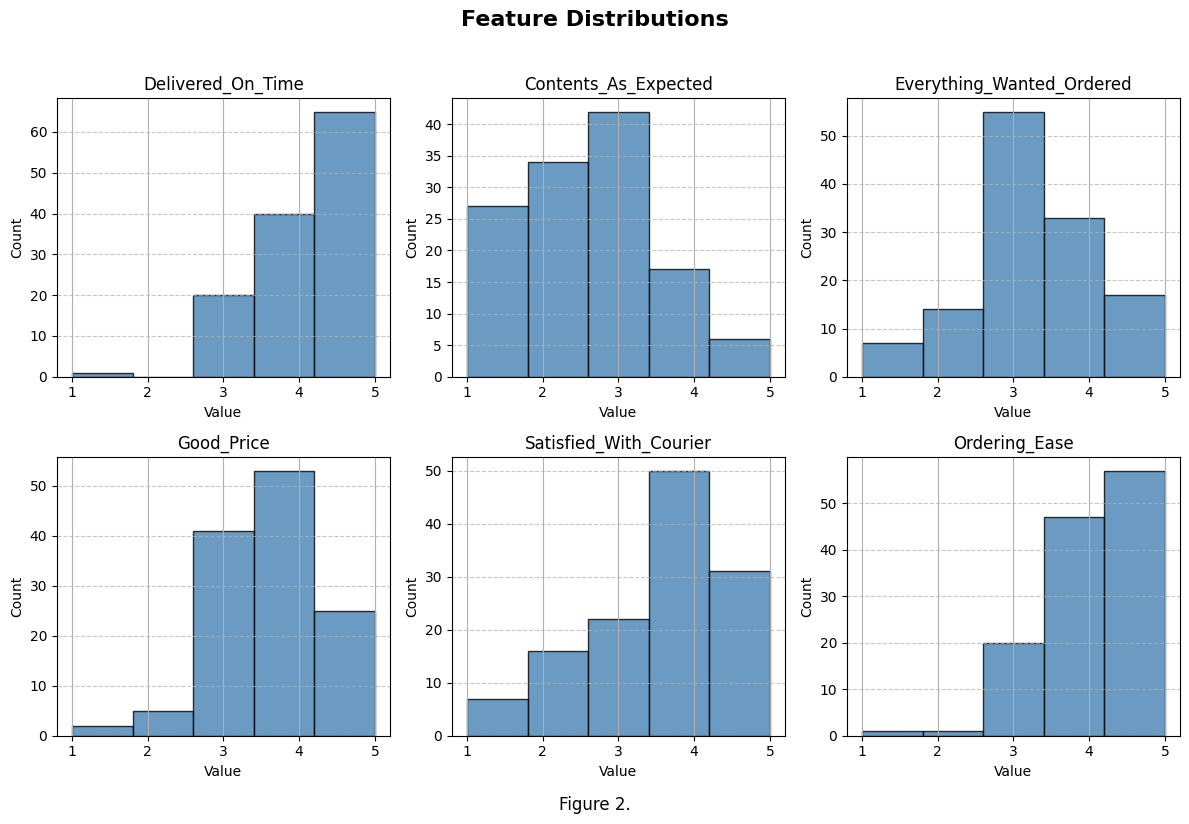

In [3]:
import matplotlib.pyplot as plt

# Create figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))  # Arrange subplots in a 2x3 grid
axes = axes.flatten()  # Flatten to easily iterate over

# Plot histograms for each feature
for i, column in enumerate(customer_survey.columns[1:]):  # Skip the first column (assuming it's the target)
    ax = axes[i]  # Select subplot
    customer_survey[column].hist(ax=ax, bins=5, edgecolor='black', color='steelblue', alpha=0.8)

    # Formatting
    ax.set_title(f'{column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability

# Adjust layout and add a main title
fig.suptitle('Feature Distributions', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust spacing to fit the title
# Add "Figure 1." label at the bottom of the figure
fig.text(0.5, -0.02, 'Figure 2.', fontsize=12, ha='center')
# Show plot
plt.show()


**Visualization Observations:**
- From **Figure 1** and the summary statistic, 45% of the customer base are unsatisfied with the business model. This is an unsustainable strategy, and issues  
must be addressed to solve this disatissfication.  
- **Figure 2** illustrates, *Everything_Wanted_Order* and *Contents_As_Expected* features are slightly right skewed with scores normally distributed   
around a lesser score of 3 compared to other features. Other features' barplots are left skewed.  

### Correlation Heatmap:  

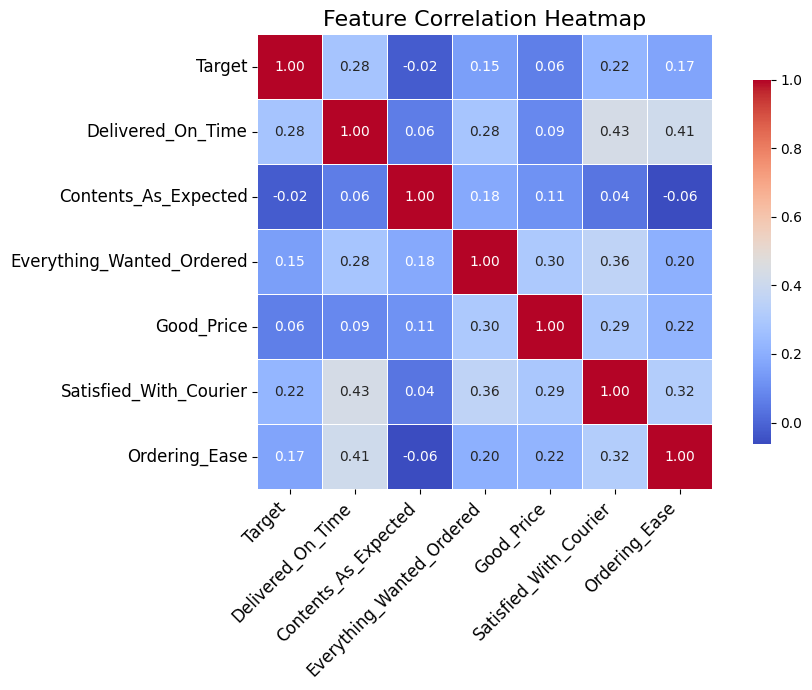

In [4]:
import seaborn as sns

correlation_matrix = customer_survey.corr()

# Plotting correlation heatmap
fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidth=0.5,
    square=True, # heatmap cells are square
    cbar_kws={'shrink':0.8},
    ax=ax
)
# Set Title
ax.set_title('Feature Correlation Heatmap', fontsize=16)
# Tick label formatting, rotate x-axis label for better visibility
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)

# Adjust layout to prevent clipping
fig.tight_layout()
# Show the plot
plt.show()

**Correlation Analysis:**  
- Features *Delivered_on_Time* and *Satisfied_With_Courier* have the highest correlation with how happy and unhappy customers are with the business product  
  at 0.28 and 0.22 respectively. *Ordering_Ease* and *Everything_Wanted_Ordered* follows up as having the next highest correlation with 0.17 and 0.15 respectively.  
- Features *Contents_As_Expected* and *Good_Price* have a weak correlation possible indicating that order expectations and price do not heavily influence  
  customer happiness.  
- Several features have high correlations with each other which may affect our classification model performance. An example is *Delivered_On_Time* and *Satisfied_With_Courier*  
  having a correlation of 0.43 since the customer would either be satisfied/disatisfied with the courier if the order was delivered on or not on time.

### Feature Selection:  
A Feature selection approach before model selecton is performed to improve classification model performance, reduce overfitting and to enhance interpretability. To determine the minimal set of  
features necessary to perserve the most information while maximizing predictability, a combination approach of statistical tests, model-based feature selection and correlation-based analysis  
will be most effective.  

**Action Plan:**  
Statisical tests will involve computing mutual information to determine how much information one variable provides about another variable and ANOVA F-Test. ANOVA F-test is used to determine if  
statistically significant differences exist between the means of two or more groups. These tests will assess whether a feature is useful in predicting the target variable. Lasso Regression (L1 Regularization)  
will be used to shrink irrelevant features to zero and Random Forest will be utilized to validate which of the features drive the prediction. Features that are highly correlated, one of the two will be removed  
to prevent redunancy.  

In [6]:
# import necessary libraries for feature selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split features from target variable
features = customer_survey.drop(columns=['Target'])
target_variable = customer_survey['Target']
np.random.seed(42)
# Standardize the features for Lasso
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Compute Mutual Information (MI) between features and target variable
mi_scores = mutual_info_classif(features, target_variable, random_state=42)
mi_df = pd.DataFrame({'Feature':features.columns, 'Mutual Information': mi_scores}).sort_values(
    by='Mutual Information', ascending=False
)
# Compute ANOVA F-test scores
anova_f_values, _ = f_classif(features, target_variable)
anova_df = pd.DataFrame({'Feature': features.columns, 'ANOVA F-Score': anova_f_values}).sort_values(
    by='ANOVA F-Score', ascending=False
)
# Fit Lasso Regularized Logistic Regression (L1 Regularization)
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.2)
# Train logistic regression model
lasso.fit(features_standardized, target_variable)
# Extract and sort the model's coefficients
lasso_df = pd.DataFrame({
    'Feature':features.columns, 
    'Lasso Coefficients':lasso.coef_[0]
    }).sort_values(by='Lasso Coefficients', key=abs, ascending=False)

# Fit Random Forest 
random_forest = RandomForestClassifier(n_estimators=100, random_state=50)
# Train model
random_forest.fit(features, target_variable)
# Extract and sort rf model's coefficients
random_forest_df = pd.DataFrame({
    'Feature':features.columns,
    'Random Forest Importance':random_forest.feature_importances_
}).sort_values(by='Random Forest Importance', ascending=False)

# Combine all feature selection dataframes
combined_feature_selection = mi_df.merge(anova_df, on='Feature').merge(lasso_df,on='Feature').merge(
    random_forest_df, on='Feature'
)
combined_feature_selection

,Feature,Mutual Information,ANOVA F-Score,Lasso Coefficients,Random Forest Importance
0,Delivered_On_Time,0.049597,10.561708,0.356213,0.170759
1,Satisfied_With_Courier,0.039892,6.582716,0.149515,0.174220
2,Contents_As_Expected,0.004522,0.073108,0.000000,0.186118
3,Everything_Wanted_Ordered,0.000000,2.886959,0.000000,0.185716
4,Good_Price,0.000000,0.516657,0.000000,0.148349
5,Ordering_Ease,0.000000,3.586849,0.000000,0.134837


**Feature Selection Findings:**  
**Mutual Information Values:**  
Mutual Information measures how much information a feature contributes to predicting our target variable (customer happiness). From the values shown in the table features **Delivered_On_Time** and **Satisfied_With_Courier** show relevant high MI values. The rest of the features show zero or near zero MI values, suggesting they contribute little unique information.  

**ANOVA F-Score:**  
The ANOVA F-Score measures the variance of the target variable explained by each feature. **Delivered_On_Time** and **Satisfied_With_Courier** explain the most variance in customer happiness with their high F-scores. **Contents_As_Expected** feature has the lowest F-score, implying it does not significantly differentiate between happy and unhappy customers.  

**Lasso Regression Coefficients:**  
Lasso Regression shrinks less important feature coefficients to 0, for feature removal selection. **Delivered_On_Time** has the highest value, confirming that this feature is strongly associated with our target variable followed by **Satisfied_With_Courier**. All the other feature's coefficient values have shrunk to 0, implying that Lasso does not consider these features important for prediction.  

**Random_Forest:**  
Random Forest Feature Importance measures the contribution of each feature in reducing predicting erros in a Random Forest model. In contrast to the previous three methods, this method values **Contents_As_Expected** and **Everything_Wanted_Ordered** over other features for tree based models.  

**Actionable Insights:**  
This approach shows that the strongest features are **Delivered_On_Time** and **Satisfied_With_Courier** in this dataset. Building a model with those two features and one additional feature such as **Ordering_Ease** can be the minimal amount of a feature set for prediction. The values also relay that removing **Contents_As_Expected** and **Everything_Wanted_Ordered** may have minimal impact for prediction and should be removed for future surveys if removal of questions is a priority in the next survey.  

### Model Building:  
The following classification models will be used to predict of a customer is happy or unhappy based on the answers they have given to the questions using our the these selected features:
- Selected Features : **Delivered_On_Time (X1)**, **Satisfied_With_Courier (X5)**, **Everything_Wanted_Ordered (X3)**, and **Ordering_Ease(X6)**.
- Training Set (86%), and Test Set(14%) to account for small dataset.
- Logistic Regression (Simple linear classifier)
- Decision Tree (tree-based classifier)
- Random Forest (ensemble of decision trees)
- Support Vector Machine (finds optimal hyperplane for separation)
- Naive Bayes (Bayes Theorem probabilistic classifer)

In [ ]:
# Selecting features and target
selected_features = ['Delivered_On_Time', 'Satisfied_With_Courier', 'Everything_Wanted_Ordered', 'Ordering_Ease']
x = customer_survey[selected_features]
y = customer_survey['Target']
random_seed = 3

# Splitting Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.14, random_state=random_seed)
x_train.to_csv('../data/processed/final_x_train.csv', index=False)
y_train.to_csv('../data/processed/final_y_train.csv', index=False)
x_test.to_csv('../data/processed/final_x_test.csv', index=False)
y_test.to_csv('../data/processed/final_y_test.csv', index=False)


# Define models to be used
models = {
    'Logistic Regression': LogisticRegression(random_state=random_seed),
    'Decision Tree': DecisionTreeClassifier(random_state=random_seed),
    'Random Forest': RandomForestClassifier(random_state=random_seed),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

# Initialize results containers
test_results = []
train_results = []

# for loop to train dataset on classification models
for name, model in models.items():
    model.fit(x_train, y_train)

    # Predictions on test and train data
    y_test_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)

    # Test metrics
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    test_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': test_report['1']['precision'],
        'Recall': test_report['1']['recall'],
        'F1-Score': test_report['1']['f1-score']
    })

    # Training metrics
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    train_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': train_report['1']['precision'],
        'Recall': train_report['1']['recall'],
        'F1-Score': train_report['1']['f1-score']
    })

# Create DataFrames
test_metrics = pd.DataFrame(test_results).sort_values(by='F1-Score', ascending=False)
train_metrics = pd.DataFrame(train_results).sort_values(by='F1-Score', ascending=False)

# Output both DataFrames
print("Test Set Performance")
display(test_metrics)

print("\n Training Set Performance")
display(train_metrics)


OSError: Cannot save file into a non-existent directory: 'Apziva Project 1\data\processed'

### Hyperparameter Tuning on all models using GridSearchCV:   
As F1 scores for each of the models aside from Random Forest are less than ideal (less than 73%), GridSearchCV will be utilized to tune each model's hyperparameters to improve their performance. Naive Bayes does not have tunable parameters, so it will GridSearchCV will not be performed on the model. Grid Search involves forming a grid that is the Cartesian product of those parameters and then sequentially trying all combinations and returning the best parameters that give the best scoring metric. Grid Search is ideal as this is a small dataset and there is a small number of hyperparameters.   

In [6]:

# Feature selection
selected_features = ['Delivered_On_Time', 'Satisfied_With_Courier', 'Everything_Wanted_Ordered', 'Ordering_Ease']
x = customer_survey[selected_features]
y = customer_survey['Target']
random_seed = 3

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.14, random_state=random_seed)

# Define hyperparameter grids for each model, use clf__parameter format due to using Pipeline
param_grids = {
    'Logistic Regression': {
        'clf__C': [0.01, 0.1, 1, 10], # inverse of regularizaton strength, lower values = more regularization
        'clf__penalty': ['l2'],
        'clf__solver': ['liblinear']  # supports l2
    },

    'Decision Tree': {
        'clf__max_depth': [3, 5, 10, None], # How deep the tree can go
        'clf__min_samples_split': [2, 5, 10], # Minimum number of samples needed to split an internal node
        'clf__min_samples_leaf': [1, 2, 4] # Minimum number of samples in a leaf node
    },

    'Random Forest': {
        'clf__n_estimators': [50, 100, 150], # Number of trees in forest, more trees leads to better generalization
        'clf__max_depth': [3, 5, 10, None], # Tree depth limit per tree
        'clf__min_samples_split': [2, 5], # threshold for when a node should split
        'clf__min_samples_leaf': [1, 2], # mininum number of samples required in a leaf
        'clf__max_features': ['sqrt', 'log2'], # number of features to consider at each split
        'clf__bootstrap' : [True, False]
    },

    'Support Vector Machine': {
        'clf__C': [0.1, 1, 10], # regularization parameter, lower values = more generalization
        'clf__kernel': ['linear', 'rbf'], # linear = linear boundary, rbf = non-linear boundary
        'clf__gamma': ['scale', 'auto']
    }
}

# Initialize models with pipelines for scaling when needed, using model Pipeline as it compelments GridSearchCV and cross validation.
model_defs = {
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(random_state=random_seed))]),
    'Decision Tree': Pipeline([('clf', DecisionTreeClassifier(random_state=random_seed))]),
    'Random Forest': Pipeline([('clf', RandomForestClassifier(random_state=random_seed))]),
    'Support Vector Machine': Pipeline([('scaler', StandardScaler()), ('clf', SVC())]),
    'Naive Bayes': Pipeline([('clf', GaussianNB())])  # No hyperparameter tuning needed
}

# Initialize results containers
test_results = []

# Loop through model presets
for name, pipeline in model_defs.items():
    print(f"Tuning: {name}")
    
    # for models with parameter grids, perform exhaustive hyperparameter search using 5-fold cross validation.
    if name in param_grids:
        # Use GridSearchCV for models with hyperparameters, optmize for F1-Score during search
        grid = GridSearchCV(pipeline, param_grids[name], scoring='f1', cv=5, n_jobs=-1)
        grid.fit(x_train, y_train) 
        # obtain model trained with best hyperparameters during grid search
        best_model = grid.best_estimator_
    else:
        # No tuning for Naive Bayes
        pipeline.fit(x_train, y_train)
        best_model = pipeline

    # Predict on test subdataset
    y_test_pred = best_model.predict(x_test)

    # Test metrics
    test_report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)
    test_results.append({
        'Model': name,
        "Best Params": grid.best_params_,
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': test_report['1']['precision'],
        'Recall': test_report['1']['recall'],
        'F1-Score': test_report['1']['f1-score']
    })


# Create results DataFrames
tunned_test_metrics = pd.DataFrame(test_results).sort_values(by='F1-Score', ascending=False)

# Output both DataFrames
print("\n Test Set Performance")
display(tunned_test_metrics)



Tuning: Logistic Regression
Tuning: Decision Tree
Tuning: Random Forest
Tuning: Support Vector Machine
Tuning: Naive Bayes

 Test Set Performance


,Model,Best Params,Accuracy,Precision,Recall,F1-Score
2,Random Forest,"{'clf__bootstrap': False, 'clf__max_depth': 5,...",0.777778,0.750000,0.9,0.818182
1,Decision Tree,"{'clf__max_depth': 3, 'clf__min_samples_leaf':...",0.722222,0.666667,1.0,0.800000
3,Support Vector Machine,"{'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__k...",0.555556,0.555556,1.0,0.714286
0,Logistic Regression,"{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__so...",0.611111,0.636364,0.7,0.666667
4,Naive Bayes,"{'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__k...",0.555556,0.583333,0.7,0.636364


In [8]:
# Merge on 'Model' column suffixes differentiate the untuned and tuned F1 scores
combined_f1_scores = test_metrics[['Model', 'F1-Score']].merge(
    tunned_test_metrics[['Model', 'F1-Score']],
    on='Model',
    suffixes=('_Untuned', '_Tuned')
)

# Sort by f1-score
combined_f1_scores = combined_f1_scores.sort_values(by='F1-Score_Tuned', ascending=False)

combined_f1_scores

,Model,F1-Score_Untuned,F1-Score_Tuned
0,Random Forest,0.761905,0.818182
2,Decision Tree,0.700000,0.800000
3,Support Vector Machine,0.666667,0.714286
1,Logistic Regression,0.727273,0.666667
4,Naive Bayes,0.636364,0.636364


**Results:**  
Hyperparameter tuning all our models besides Naive Bayes results in Random Forest having the highest F1-Score of 82% which surpasses our objective of reaching an F1-Score of 73% or more. The precision of the tuned Random Forest is 75% and the recall is 90%. The tuned hyperparameters for the Random Forest are as follows: bootstrap:False, max_depth:5, max_features:sqrt, min_samples_leaf:2, min_samples_split:5, and n_estimators:150. 

**Conclusion:**  
Among the various classification models evaluated, the **Random Forest model** demonstrated the highest perforamnce, achieving an **accuracy of 78%** and an **F1-Score of 81.78%**.  

Through exploratory data analysis (EDA) and feature selection, the most influential features for predicting customer happiness were identified as follows: X1 (my order was delivered on time), X3 (I received everything I ordered), X5 (I am satisfied with my courier), and X6 (the app makes ordering easy for me). Among these, X5 and X1 emerged as the strongest features in terms of predictive power. These four features form the minimal set that retains the most predictive information about customer satisfaction. Reducing the feature set further results in a noticeable drop in model performance.  

Based on their limited contribution to prediction accuracy, the company may consider removing the following questions from the survey: X2 (the contents of my order were as I expected) and X4 (I paid a good price). These variables showed low predictive power in determining overall customer happiness.